## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib

## Load Dataset

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.shape

(284807, 31)

31 Columns

2 are Time & Amount

In [4]:
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


## Exploratory Data Analysis

### Check Missing Values

In [6]:
df.isnull().values.any()

False

No missing values

### Class Distribution

In [7]:
print(df['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [9]:
print("Number of Frauds sample:")
frauds.shape

Number of Frauds sample:


(492, 31)

In [10]:
print("Number of Normal Sample:")
normal.shape

Number of Normal Sample:


(284315, 31)

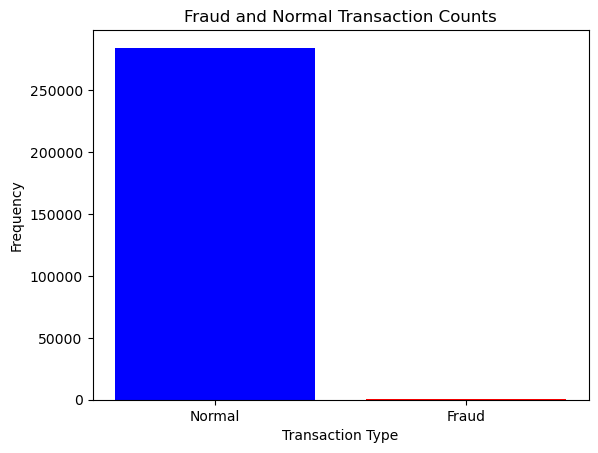

In [11]:
# Count the occurrences of fraud and normal transactions
fraud_count = len(frauds)
normal_count = len(normal)

# Data for the bar plot
categories = ['Normal', 'Fraud']
counts = [normal_count, fraud_count]

# Plot the bar chart
plt.bar(categories, counts, color=['blue', 'red'])
plt.title("Fraud and Normal Transaction Counts")
plt.xlabel("Transaction Type")
plt.ylabel("Frequency")
plt.show()

The number of fraud sample is too small to be vizualized.

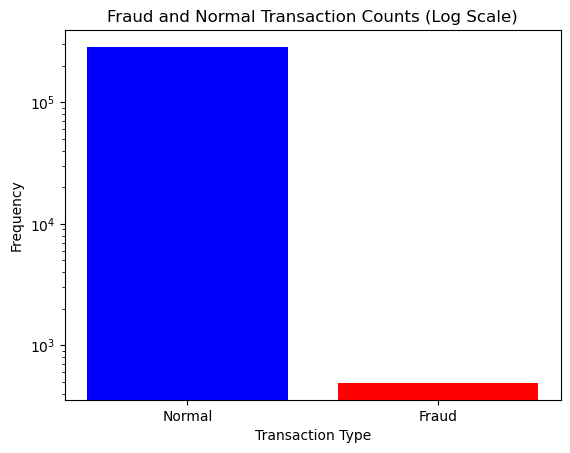

In [12]:
# New plot on logarithmic scale
plt.bar(categories, counts, color=['blue', 'red'])
plt.title("Fraud and Normal Transaction Counts (Log Scale)")
plt.xlabel("Transaction Type")
plt.ylabel("Frequency")
plt.yscale('log') 
plt.show()

Imbalanced datasets

### Amount of money used in different class

In [13]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

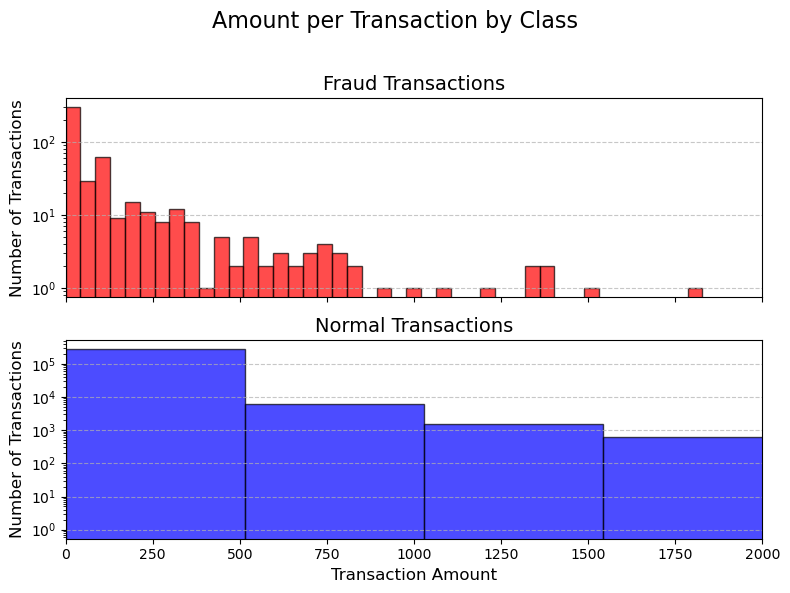

In [15]:
# Create the subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
f.suptitle('Amount per Transaction by Class', fontsize=16)

# Parameters
bins = 50
max_amount = 2000  # Set the maximum amount for the x-axis

# Fraud Histogram
ax1.hist(frauds.Amount, bins=bins, color='red', alpha=0.7, edgecolor='black')
ax1.set_title('Fraud Transactions', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.set_xlim((0, max_amount))
ax1.set_yscale('log')

# Normal Histogram
ax2.hist(normal.Amount, bins=bins, color='blue', alpha=0.7, edgecolor='black')
ax2.set_title('Normal Transactions', fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xlabel('Transaction Amount', fontsize=12)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.set_xlim((0, max_amount))
ax2.set_yscale('log')

# Adjust layout for clarity
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

Fraud transaction seems to target smaller transaction amounts

### Transaction class againts Time

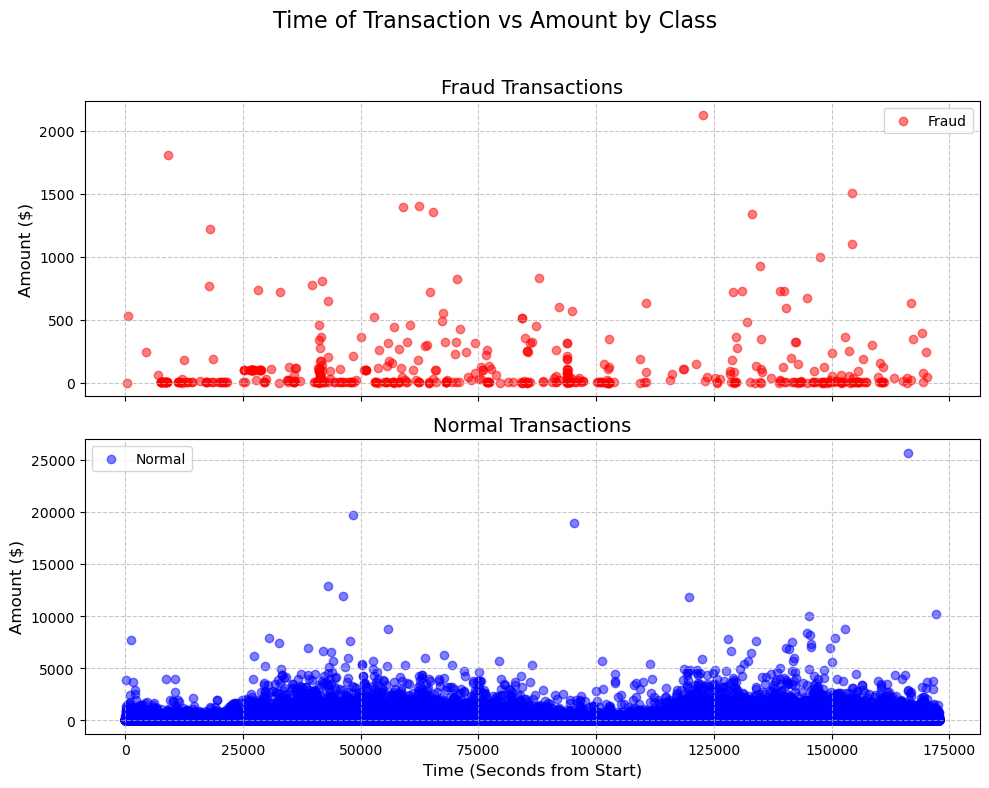

In [16]:
# Create the subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
f.suptitle('Time of Transaction vs Amount by Class', fontsize=16)

# Fraud Transactions Scatter Plot
ax1.scatter(frauds.Time, frauds.Amount, color='red', alpha=0.5, label='Fraud')
ax1.set_title('Fraud Transactions', fontsize=14)
ax1.set_ylabel('Amount ($)', fontsize=12)
ax1.grid(axis='both', linestyle='--', alpha=0.7)
ax1.legend()

# Normal Transactions Scatter Plot
ax2.scatter(normal.Time, normal.Amount, color='blue', alpha=0.5, label='Normal')
ax2.set_title('Normal Transactions', fontsize=14)
ax2.set_xlabel('Time (Seconds from Start)', fontsize=12)
ax2.set_ylabel('Amount ($)', fontsize=12)
ax2.grid(axis='both', linestyle='--', alpha=0.7)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the suptitle
plt.show()

Time of transaction does not really matter

### Drop Time Column

In [17]:
df = df.drop(['Time'], axis =1)

In [18]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Normalization

In [19]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

### Check for duplicates

In [20]:
df.duplicated().any()

True

In [21]:
df = df.drop_duplicates()

## Data Splitting

In [22]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [23]:
X = df.drop('Class', axis = 1)
y=df['Class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Modelling

### Used Models: 
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Classifier
5. K-Nearest Neighbors Classifier
6. Gaussian Naive Bayes
7. AdaBoost Classifier
8. Gradient Boosting Classifier
9. Bagging Classifier
10. Extra Trees Classifier
11. Stochastic Gradient Descent Classifier
12. Voting Classifier


### Function to Evaluate Classifier

In [25]:
def evaluate_classifier(clf_name, clf, X_train, y_train, X_test, y_test):
    print(f"\n========== {clf_name} ==========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print(f" Recall: {recall}")
    print(f" F1 Score: {f1}")
    
    # Confusion Matrix
    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Classification Report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

### Logistic Regression

In [26]:
# Logistic Regression
lr = LogisticRegression()
evaluate_classifier("Logistic Regression", lr, X_train, y_train, X_test, y_test)


========== Logistic Regression ==========

 Accuracy: 0.9992563437505668
 Precision: 0.890625
 Recall: 0.6263736263736264
 F1 Score: 0.7354838709677419

 Confusion Matrix:
[[55035     7]
 [   34    57]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.89      0.63      0.74        91

    accuracy                           1.00     55133
   macro avg       0.95      0.81      0.87     55133
weighted avg       1.00      1.00      1.00     55133



### Decision Tree

In [27]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
evaluate_classifier("Decision Tree Classifier", dt, X_train, y_train, X_test, y_test)


========== Decision Tree Classifier ==========

 Accuracy: 0.9989479984764116
 Precision: 0.6736842105263158
 Recall: 0.7032967032967034
 F1 Score: 0.6881720430107527

 Confusion Matrix:
[[55011    31]
 [   27    64]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.67      0.70      0.69        91

    accuracy                           1.00     55133
   macro avg       0.84      0.85      0.84     55133
weighted avg       1.00      1.00      1.00     55133



### Random Forest

In [28]:
# Random Forest Classifier
rf = RandomForestClassifier()
evaluate_classifier("Random Forest Classifier", rf, X_train, y_train, X_test, y_test)



========== Random Forest Classifier ==========

 Accuracy: 0.9994377233235993
 Precision: 0.9166666666666666
 Recall: 0.7252747252747253
 F1 Score: 0.8098159509202454

 Confusion Matrix:
[[55036     6]
 [   25    66]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.92      0.73      0.81        91

    accuracy                           1.00     55133
   macro avg       0.96      0.86      0.90     55133
weighted avg       1.00      1.00      1.00     55133



### Support Vector

In [29]:
# Support Vector Classifier
svc = SVC()
evaluate_classifier("Support Vector Classifier", svc, X_train, y_train, X_test, y_test)



========== Support Vector Classifier ==========

 Accuracy: 0.9993288955797798
 Precision: 0.9354838709677419
 Recall: 0.6373626373626373
 F1 Score: 0.7581699346405228

 Confusion Matrix:
[[55038     4]
 [   33    58]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.94      0.64      0.76        91

    accuracy                           1.00     55133
   macro avg       0.97      0.82      0.88     55133
weighted avg       1.00      1.00      1.00     55133



### K-Nearest Neighbors

In [30]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
evaluate_classifier("K-Nearest Neighbors Classifier", knn, X_train, y_train, X_test, y_test)


========== K-Nearest Neighbors Classifier ==========

 Accuracy: 0.999419585366296
 Precision: 0.8831168831168831
 Recall: 0.7472527472527473
 F1 Score: 0.8095238095238095

 Confusion Matrix:
[[55033     9]
 [   23    68]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.88      0.75      0.81        91

    accuracy                           1.00     55133
   macro avg       0.94      0.87      0.90     55133
weighted avg       1.00      1.00      1.00     55133



### Gaussian Naive Bayes

In [31]:
# Gaussian Naive Bayes
gnb = GaussianNB()
evaluate_classifier("Gaussian Naive Bayes", gnb, X_train, y_train, X_test, y_test)


========== Gaussian Naive Bayes ==========

 Accuracy: 0.9781618994068888
 Precision: 0.057279236276849645
 Recall: 0.7912087912087912
 F1 Score: 0.10682492581602374

 Confusion Matrix:
[[53857  1185]
 [   19    72]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     55042
           1       0.06      0.79      0.11        91

    accuracy                           0.98     55133
   macro avg       0.53      0.88      0.55     55133
weighted avg       1.00      0.98      0.99     55133



### AdaBoost

In [32]:
# AdaBoost Classifier
ada = AdaBoostClassifier()
evaluate_classifier("AdaBoost Classifier", ada, X_train, y_train, X_test, y_test)


========== AdaBoost Classifier ==========


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



 Accuracy: 0.9991112400921408
 Precision: 0.75
 Recall: 0.6923076923076923
 F1 Score: 0.72

 Confusion Matrix:
[[55021    21]
 [   28    63]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.75      0.69      0.72        91

    accuracy                           1.00     55133
   macro avg       0.87      0.85      0.86     55133
weighted avg       1.00      1.00      1.00     55133



### Gradient Boosting

In [33]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
evaluate_classifier("Gradient Boosting Classifier", gb, X_train, y_train, X_test, y_test)


========== Gradient Boosting Classifier ==========

 Accuracy: 0.9986033772876499
 Precision: 0.71875
 Recall: 0.25274725274725274
 F1 Score: 0.37398373983739835

 Confusion Matrix:
[[55033     9]
 [   68    23]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.72      0.25      0.37        91

    accuracy                           1.00     55133
   macro avg       0.86      0.63      0.69     55133
weighted avg       1.00      1.00      1.00     55133



### Bagging

In [34]:
# Bagging Classifier
bagging = BaggingClassifier()
evaluate_classifier("Bagging Classifier", bagging, X_train, y_train, X_test, y_test)


========== Bagging Classifier ==========

 Accuracy: 0.999492137195509
 Precision: 0.8888888888888888
 Recall: 0.7912087912087912
 F1 Score: 0.8372093023255814

 Confusion Matrix:
[[55033     9]
 [   19    72]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.89      0.79      0.84        91

    accuracy                           1.00     55133
   macro avg       0.94      0.90      0.92     55133
weighted avg       1.00      1.00      1.00     55133



### Extra Trees

In [35]:
# Extra Trees Classifier
extra_trees = ExtraTreesClassifier()
evaluate_classifier("Extra Trees Classifier", extra_trees, X_train, y_train, X_test, y_test)


========== Extra Trees Classifier ==========

 Accuracy: 0.9994739992382058
 Precision: 0.9305555555555556
 Recall: 0.7362637362637363
 F1 Score: 0.8220858895705522

 Confusion Matrix:
[[55037     5]
 [   24    67]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.93      0.74      0.82        91

    accuracy                           1.00     55133
   macro avg       0.97      0.87      0.91     55133
weighted avg       1.00      1.00      1.00     55133



### Stochastic Gradient Descent

In [36]:
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier()
evaluate_classifier("Stochastic Gradient Descent Classifier", sgd, X_train, y_train, X_test, y_test)


========== Stochastic Gradient Descent Classifier ==========

 Accuracy: 0.9990568262202311
 Precision: 0.8095238095238095
 Recall: 0.5604395604395604
 F1 Score: 0.6623376623376623

 Confusion Matrix:
[[55030    12]
 [   40    51]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.81      0.56      0.66        91

    accuracy                           1.00     55133
   macro avg       0.90      0.78      0.83     55133
weighted avg       1.00      1.00      1.00     55133



### Voting

In [37]:
# Voting Classifier
voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC()),
    ('knn', KNeighborsClassifier())
], voting='hard')
evaluate_classifier("Voting Classifier", voting, X_train, y_train, X_test, y_test)


========== Voting Classifier ==========

 Accuracy: 0.9994739992382058
 Precision: 0.9305555555555556
 Recall: 0.7362637362637363
 F1 Score: 0.8220858895705522

 Confusion Matrix:
[[55037     5]
 [   24    67]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.93      0.74      0.82        91

    accuracy                           1.00     55133
   macro avg       0.97      0.87      0.91     55133
weighted avg       1.00      1.00      1.00     55133



##### Best Model = Logistic Regression & Decision Tree

## Undersampling

In [38]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

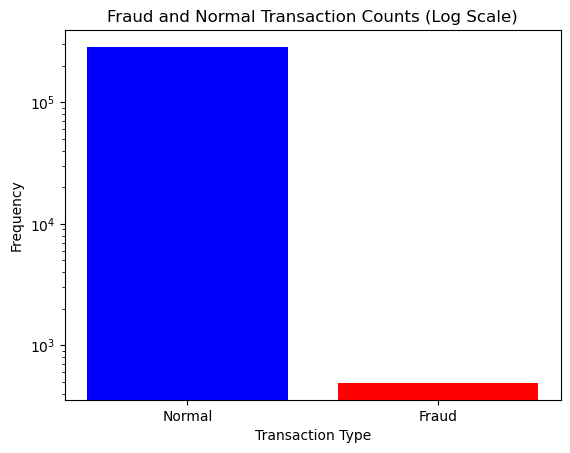

In [39]:
# New plot on logarithmic scale
plt.bar(categories, counts, color=['blue', 'red'])
plt.title("Fraud and Normal Transaction Counts (Log Scale)")
plt.xlabel("Transaction Type")
plt.ylabel("Frequency")
plt.yscale('log') 
plt.show()

Highly imbalanced dataset. Perform undersampling = reduces the size of the majority class to balance it with the minority class

In [40]:
print(f'Normal Transaction: {normal.shape}')
print(f'Fraud Transaction: {fraud.shape}')

Normal Transaction: (275190, 30)
Fraud Transaction: (473, 30)


### Decrease number of Normal Sample

In [41]:
normal_sample = normal.sample(n=473)
normal_sample.shape

(473, 30)

### Create new dataframe

In [42]:
new_df = pd.concat([normal_sample,fraud], ignore_index=True)

In [43]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [44]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

### Split new dataset

In [45]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Modelling with new dataset

#### Logistic Regression

In [47]:
# Logistic Regression
lr = LogisticRegression()
evaluate_classifier("Logistic Regression", lr, X_train, y_train, X_test, y_test)


========== Logistic Regression ==========

 Accuracy: 0.9263157894736842
 Precision: 0.9489795918367347
 Recall: 0.9117647058823529
 F1 Score: 0.93

 Confusion Matrix:
[[83  5]
 [ 9 93]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        88
           1       0.95      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



#### Decision Tree

In [48]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
evaluate_classifier("Decision Tree Classifier", dt, X_train, y_train, X_test, y_test)


========== Decision Tree Classifier ==========

 Accuracy: 0.9052631578947369
 Precision: 0.9285714285714286
 Recall: 0.8921568627450981
 F1 Score: 0.91

 Confusion Matrix:
[[81  7]
 [11 91]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        88
           1       0.93      0.89      0.91       102

    accuracy                           0.91       190
   macro avg       0.90      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190



## Oversampling

In [49]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [50]:
X.shape

(275663, 29)

In [51]:
y.shape

(275663,)

In [52]:
X_res, y_res = SMOTE().fit_resample(X,y)

increase the number of samples from the minority class.

SMOTE (Synthetic Minority Oversampling Technique) creates new, synthetic instances from the minority class.


In [53]:
normal_count = (y_res == 0).sum()
fraud_count = (y_res == 1).sum()

print(f"Normal Transaction: ({normal_count}, {X_res.shape[1]})")
print(f"Fraud Transaction: ({fraud_count}, {X_res.shape[1]})")

Normal Transaction: (275190, 29)
Fraud Transaction: (275190, 29)


### Split new data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

### Modelling new data

#### Logistic Regression

In [55]:
# Logistic Regression
lr = LogisticRegression()
evaluate_classifier("Logistic Regression", lr, X_train, y_train, X_test, y_test)


========== Logistic Regression ==========

 Accuracy: 0.9451924125149896
 Precision: 0.9727929250019309
 Recall: 0.9159318582622766
 F1 Score: 0.9435064752647695

 Confusion Matrix:
[[53664  1409]
 [ 4624 50379]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     55073
           1       0.97      0.92      0.94     55003

    accuracy                           0.95    110076
   macro avg       0.95      0.95      0.95    110076
weighted avg       0.95      0.95      0.95    110076



#### Decision Tree

In [56]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
evaluate_classifier("Decision Tree Classifier", dt, X_train, y_train, X_test, y_test)


========== Decision Tree Classifier ==========

 Accuracy: 0.9981558196155383
 Precision: 0.9973860005808888
 Recall: 0.998927331236478
 F1 Score: 0.9981560708868118

 Confusion Matrix:
[[54929   144]
 [   59 54944]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



## Making a Predictions

### Save the model

In [57]:
joblib.dump(dt, "credit_card_model.pkl")

['credit_card_model.pkl']

### Load the model

In [58]:
model = joblib.load("credit_card_model.pkl")

### Making Predictions

In [59]:
pred = model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,
                       1.37815522427443,-0.338320769942518,0.462387777762292,
                       0.239598554061257,0.0986979012610507,0.363786969611213,
                       0.0907941719789316,-0.551599533260813,-0.617800855762348,
                       -0.991389847235408,-0.311169353699879,1.46817697209427,
                       -0.470400525259478,0.207971241929242,0.0257905801985591,
                       0.403992960255733,0.251412098239705,-0.018306777944153,
                       0.277837575558899,-0.110473910188767,0.0669280749146731,
                       0.128539358273528,-0.189114843888824,0.133558376740387,
                       -0.0210530534538215,149.62]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [60]:
if pred[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation


In [63]:
!jupyter nbconvert --to html FraudDetection.ipynb


[NbConvertApp] Converting notebook FraudDetection.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 710855 bytes to FraudDetection.html
